<a href="https://colab.research.google.com/github/PkwPanu/Model/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

(Xtrain, Ytrain), (Xtest,Ytest) = tf.keras.datasets.mnist.load_data()

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
print(Xtrain.shape,'\n',Xtrain.dtype)

(60000, 28, 28) 
 uint8


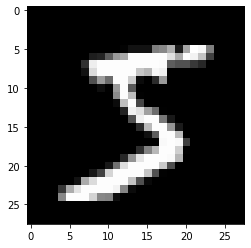

5


In [ ]:
plt.imshow(Xtrain[0],cmap='gray')
plt.show()
print(Ytrain[0])

# CNN

In [ ]:
def onehot(Y,nclass=10):
  
  relation = np.zeros((Y.shape[0], nclass))
  for i, y in enumerate(Y):
    relation[i, Y[i]] = 1
  return relation

def my_onehot_encoder(Y):
  Y= [str(i) for i in Y]
  relation = {}
  x=np.unique(Y)

  for i, y in enumerate(np.unique(Y)):
    relation[y] = i
    
  output=np.zeros([len(Y),len(x)])
  for i, y in enumerate(Y):
    num=relation[y]
    output[i,num]=1

  return output

In [ ]:
a=['a','b','a',1,0.5,'1',2,'a']
b=my_onehot_encoder(a)

In [ ]:
input_shape = (4,28, 28, 1)
x = tf.random.normal(input_shape)
x = tf.keras.layers.Conv2D(3,3,activation ='relu',input_shape=input_shape[1:])(x)
print(x.shape)

(4, 26, 26, 3)


In [ ]:
# Fully connected model
Xtrain2=Xtrain.reshape(-1,28*28,1)
Xtest2=Xtest.reshape(-1,28*28,1)
Ytrain2=onehot(Ytrain)
Ytest2=onehot(Ytest)

d_in = (Xtrain2.shape[1],)
model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(200,input_shape=d_in,activation='relu'))
model2.add(tf.keras.layers.Dense(200,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(lr=0.001))
model2.summary()
#model.fit((Xtrain2 /255.),Ytrain2, epochs=50, validation_data=(Xtest2/255., Ytest2))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit((Xtrain2 /255.),Ytrain2, epochs=20, validation_data=(Xtest2/255., Ytest2))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0105 - val_loss: 0.0063
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [ ]:
Xtrain1=Xtrain.reshape(-1,28,28,1)
Xtest1=Xtest.reshape(-1,28,28,1)
Ytrain1=onehot(Ytrain).reshape(-1,1,1,10)
Ytest1=onehot(Ytest).reshape(-1,1,1,10)

input1 = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(20,4,activation ='relu')(input1)
x = tf.keras.layers.Conv2D(15,25,activation ='relu')(x)
output_tensor = tf.keras.layers.Dense(10,activation ='Softmax')(x)
model1 = tf.keras.Model([input1],output_tensor)

model1.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(lr=0.001))
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 20)        340       
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 15)          187515    
                                                                 
 dense_3 (Dense)             (None, 1, 1, 10)          160       
                                                                 
Total params: 188,015
Trainable params: 188,015
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit((Xtrain1 /255.),Ytrain1, epochs=20, validation_data=(Xtest1/255., Ytest1))

Epoch 1/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0103 - val_loss: 0.0042
Epoch 2/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 3/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 9/20
1875/1875 [==============================] - 34s 18ms/step - loss: 9.9810e-04 - val_loss: 0.0029
Epoch 10/20
1875/1875 [==============================] - 35s

In [ ]:
#model3
d_in = (Xtrain2.shape[1],)
model3= tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(60,input_shape=d_in,activation='relu'))
model3.add(tf.keras.layers.Dense(50,activation='relu'))

model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(lr=0.001))
model3.summary()

#model4
input1 = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(8,4,activation ='relu')(input1)
output_tensor = tf.keras.layers.Conv2D(10,25,activation ='Softmax')(x)
#output_tensor = tf.keras.layers.Dense(10,activation ='Softmax')(x)
model4 = tf.keras.Model([input1],output_tensor)

model4.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(lr=0.001))
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 60)                47100     
                                                                 
 dense_46 (Dense)            (None, 50)                3050      
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
Total params: 50,660
Trainable params: 50,660
Non-trainable params: 0
_________________________________________________________________


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 25, 25, 8)         136       
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 1, 10)          50010     
                                                                 
Total params: 50,146
Trainable params: 50,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit((Xtrain2 /255.),Ytrain2, epochs=20, validation_data=(Xtest2/255., Ytest2))
model4.fit((Xtrain1 /255.),Ytrain1, epochs=20, validation_data=(Xtest1/255., Ytest1))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0130 - val_loss: 0.0070
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - val_loss: 0.0046
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.002

In [ ]:
#accuracy CNN model VS Fully connected model (around 50,000 parameters in both model with 20 epochs trained)

Y_predict=np.argmax(model3.predict(Xtest2/255.,verbose=0),axis=1)
#Y_ture=(np.argmax(Ytest2,axis=1))
acc=  sum(Y_predict==Ytest)/len(Ytest)
print('DNN :',acc)

Y_predict=np.argmax(model4.predict(Xtest1/255.,verbose=0).reshape(-1,10),axis=1)
#Y_ture=(np.argmax(Ytest1.reshape(-1,10),axis=1))
acc =  sum(Y_predict==Ytest)/len(Ytest)
print('CNN :',acc)

DNN : 0.9725
CNN : 0.9827


In [ ]:
#accuracy CNN model VS Fully connected model (around 200,000 parameters in both model with 20 epochs trained)

Y_predict=np.argmax(model2.predict(Xtest2/255.,verbose=0),axis=1)
#Y_ture=(np.argmax(Ytest2,axis=1))
acc=  sum(Y_predict==Ytest)/len(Ytest)
print('DNN :',acc)

Y_predict=np.argmax(model1.predict(Xtest1/255.,verbose=0).reshape(-1,10),axis=1)
#Y_ture=(np.argmax(Ytest1.reshape(-1,10),axis=1))
acc =  sum(Y_predict==Ytest)/len(Ytest)
print('CNN :',acc)


DNN : 0.9805
CNN : 0.9834
